In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

sns.set_theme(style="whitegrid")

1 Install and Explore the Data

In [2]:
df = pd.read_stata("/Users/berkeelibol/Downloads/GSS_stata/gss7224_r2.dta", convert_categoricals=False)

subset_df = df[['educ', 'realinc', 'age', 'sex']].dropna()

print(subset_df.head())
print(subset_df.info())

   educ  realinc   age  sex
0  16.0  18951.0  23.0  2.0
1  10.0  24366.0  70.0  1.0
2  12.0  24366.0  48.0  2.0
3  17.0  30458.0  27.0  2.0
4  12.0  50763.0  61.0  2.0
<class 'pandas.core.frame.DataFrame'>
Index: 67281 entries, 0 to 75698
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   educ     67281 non-null  float64
 1   realinc  67281 non-null  float64
 2   age      67281 non-null  float64
 3   sex      67281 non-null  float64
dtypes: float64(4)
memory usage: 2.6 MB
None


2 Descriptive Statistics

               educ        realinc           age           sex
count  67281.000000   67281.000000  67281.000000  67281.000000
mean      13.143547   32539.129257     46.222604      1.548565
std        3.156589   30438.357206     17.265301      0.497640
min        0.000000     181.500000     18.000000      1.000000
25%       12.000000   12080.625000     32.000000      1.000000
50%       13.000000   24502.500000     44.000000      2.000000
75%       16.000000   40900.000000     59.000000      2.000000
max       20.000000  162607.000000     89.000000      2.000000


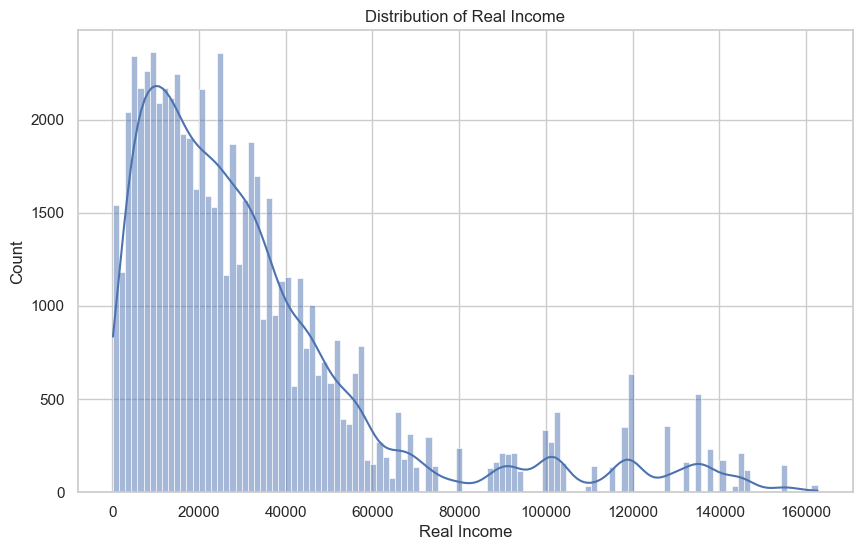

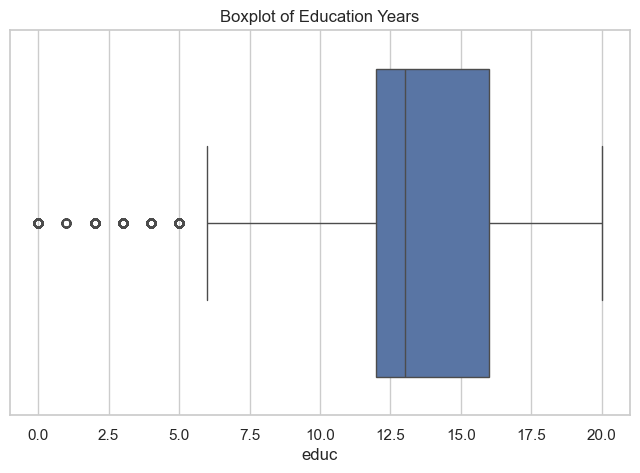

In [3]:
print(subset_df.describe())

#Histogram for Income 
plt.figure(figsize=(10, 6))
sns.histplot(subset_df['realinc'], kde=True)
plt.title('Distribution of Real Income')
plt.xlabel('Real Income')
plt.show()

#Box plot for Education 
plt.figure(figsize=(8, 5))
sns.boxplot(x=subset_df['educ'])
plt.title('Boxplot of Education Years')
plt.show()

3 Inferential Statistics

In [4]:
# Income between Sexes (T-test) 
group1 = subset_df[subset_df['sex'] == 1]['realinc']
group2 = subset_df[subset_df['sex'] == 2]['realinc']

t_stat, p_val = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

mean_g1 = np.mean(group1)
sem_g1 = stats.sem(group1)
ci_g1 = stats.t.interval(0.95, len(group1)-1, loc=mean_g1, scale=sem_g1)
print(f"95% Confidence Interval for Group 1 Mean: {ci_g1}")

T-statistic: 25.315492928961635, P-value: 9.874336715854109e-141
95% Confidence Interval for Group 1 Mean: (np.float64(35441.9371439609), np.float64(36154.89146929174))


4 Correlation

             educ   realinc       age
educ     1.000000  0.370779 -0.124286
realinc  0.370779  1.000000 -0.022506
age     -0.124286 -0.022506  1.000000


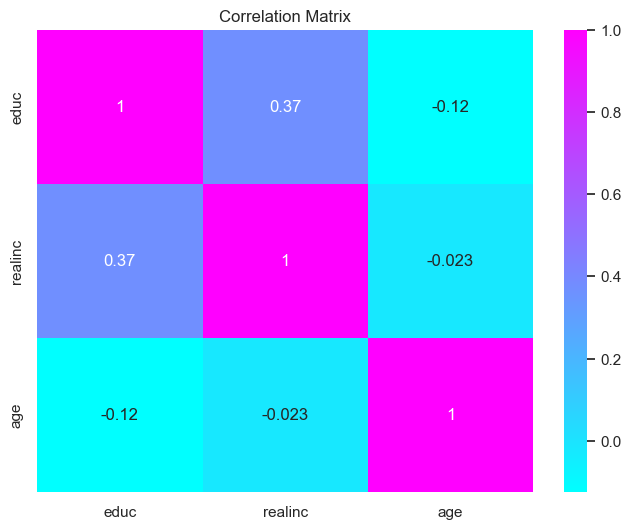

In [9]:
corr_matrix = subset_df[['educ', 'realinc', 'age']].corr()
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='cool')
plt.title('Correlation Matrix')
plt.show()

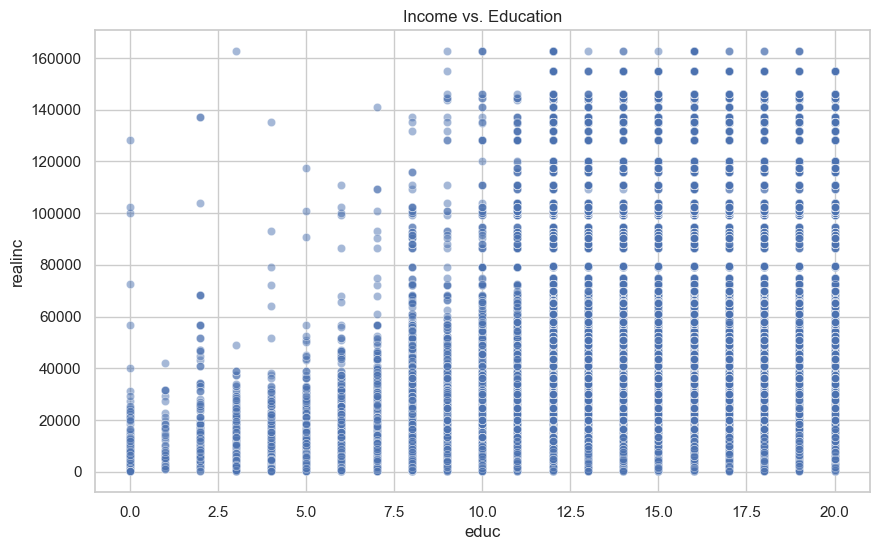

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='educ', y='realinc', data=subset_df, alpha=0.5)
plt.title('Income vs. Education')
plt.show()

5 Regression

In [6]:
X = subset_df[['educ', 'age']]
y = subset_df['realinc']
X = sm.add_constant(X)  

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                realinc   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     5387.
Date:                Thu, 18 Dec 2025   Prob (F-statistic):               0.00
Time:                        21:35:42   Log-Likelihood:            -7.8504e+05
No. Observations:               67281   AIC:                         1.570e+06
Df Residuals:                   67278   BIC:                         1.570e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.678e+04    583.711    -28.751      0.0

6.1 Model Diagnostics

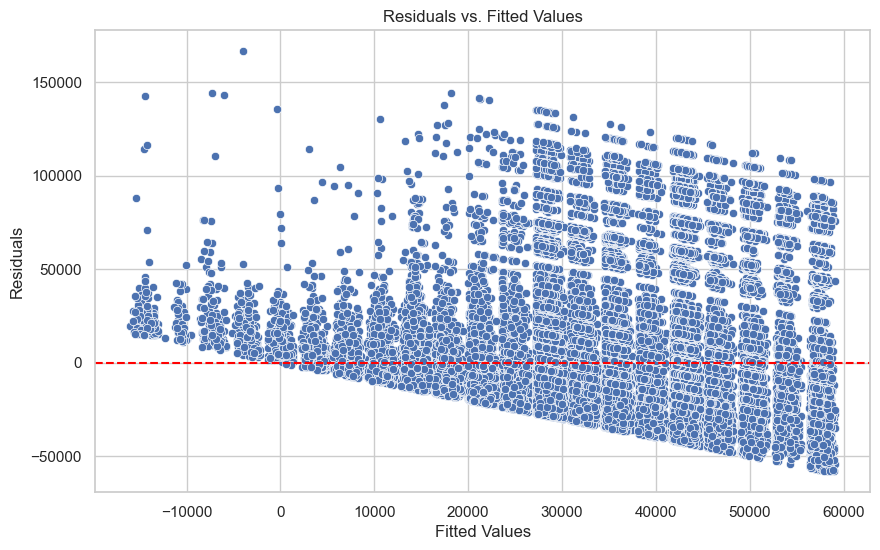

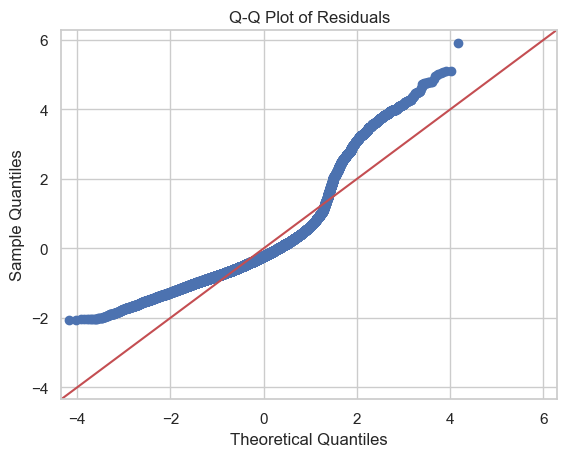

In [7]:
#Validity of assumptions
residuals = model.resid
fitted_vals = model.fittedvalues

#Linearity & Homoscedasticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

#Normality: Q-Q Plot
fig = sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

6.2-Adressing Issues in Diagnostics

                            OLS Regression Results                            
Dep. Variable:            log_realinc   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     5473.
Date:                Thu, 18 Dec 2025   Prob (F-statistic):               0.00
Time:                        21:35:43   Log-Likelihood:                -94032.
No. Observations:               67281   AIC:                         1.881e+05
Df Residuals:                   67278   BIC:                         1.881e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3043      0.020    410.706      0.0

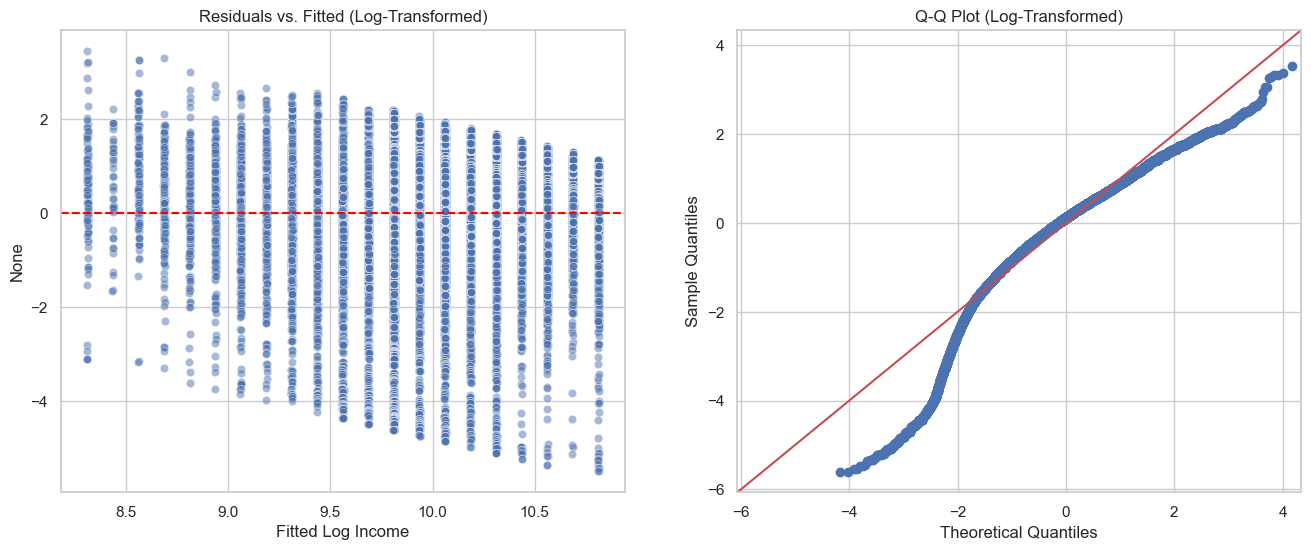

In [8]:
#log-transformed version of income
subset_df['log_realinc'] = np.log(subset_df['realinc'] + 1)

#Re-run the Regression 
y_log = subset_df['log_realinc']
X = subset_df[['educ', 'age']]
X = sm.add_constant(X)

model_log = sm.OLS(y_log, X).fit()

print(model_log.summary())

#Re-check Diagnostics
residuals_log = model_log.resid
fitted_vals_log = model_log.fittedvalues


fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Residuals vs Fitted
sns.scatterplot(x=fitted_vals_log, y=residuals_log, ax=ax[0], alpha=0.5)
ax[0].axhline(0, color='red', linestyle='--')
ax[0].set_title('Residuals vs. Fitted (Log-Transformed)')
ax[0].set_xlabel('Fitted Log Income')

# Q-Q Plot
sm.qqplot(residuals_log, line='45', fit=True, ax=ax[1])
ax[1].set_title('Q-Q Plot (Log-Transformed)')

plt.show()